# Exploratory Data Analysis

- Libraries

In [39]:
import pandas as pd
import plotly.express as px

- Import data

In [40]:
%store -r final_df
df = final_df
df.head()   

,Country,Status,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,Developing,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,Developing,2014,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,Developing,2013,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,Developing,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,Developing,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [41]:
df.to_csv('/home/davidkibet/Desktop/Life Expectancy ML/docs/EDA_for_data.csv')

## Univariate

### 1. Countries

In [42]:
import plotly.express as px

# Create a choropleth map
fig = px.choropleth(
    df,
    locations="Country",
    locationmode="country names",  # Match country names in your dataset
    color="Life expectancy ",
    color_continuous_scale="YlGnBu",
    title="Choropleth Map of the Average Life Expectancy by Country"
)

# Update layout for full width, centered title, and tight layout
fig.update_layout(
    autosize=True,  # Ensures full-width rendering [[3]]
    title_x=0.5,    # Centers the title horizontally [[4]]
    margin=dict(l=20, r=20, t=40, b=20)  # Reduces whitespace for a tight layout [[9]]
)

fig.write_html("/home/davidkibet/Desktop/Life Expectancy ML/docs/life_expectancy.html")
fig.show(renderer='browser')

### 2. Year

#### a. Animated map of life expectancy from 2000-2015

- Set the zmin and zmax parameters to establish a fixed range for the color scale. These values represent the minimum and maximum life expectancy across all years in your dataset

In [43]:
zmin = df['Life expectancy '].min()  # Minimum life expectancy across all years
zmax = df['Life expectancy '].max()  # Maximum life expectancy across all years

In [45]:
#Plot
df_sorted = df.sort_values(by="Year", ascending=True)

# Create an animated choropleth map
fig = px.choropleth(
    df_sorted,
    locations='Country',
    locationmode="country names",  # Match country names in your dataset
    color='Life expectancy ',
    animation_frame='Year',       # Column defining the temporal progression
    color_continuous_scale="YlGnBu",
    range_color=(zmin, zmax),
    title="Animated Choropleth Map of Life Expectancy (2000–2015)"
)

# Update layout for better appearance
fig.update_layout(
    autosize=True,               # Ensures full-width rendering
    title_x=0.5,                 # Centers the title horizontally
    margin=dict(l=20, r=20, t=40, b=20)  # Reduces whitespace for a tight layout
)
fig.write_html("/home/davidkibet/Desktop/Life Expectancy ML/docs/animated_life_expectancy.html")
# Show the figure
fig.show(renderer='browser')     # Renders in full width

#### b. Correlation Heatmap

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
cols = ['Year', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling']

In [ ]:
corr = df[cols].corr()

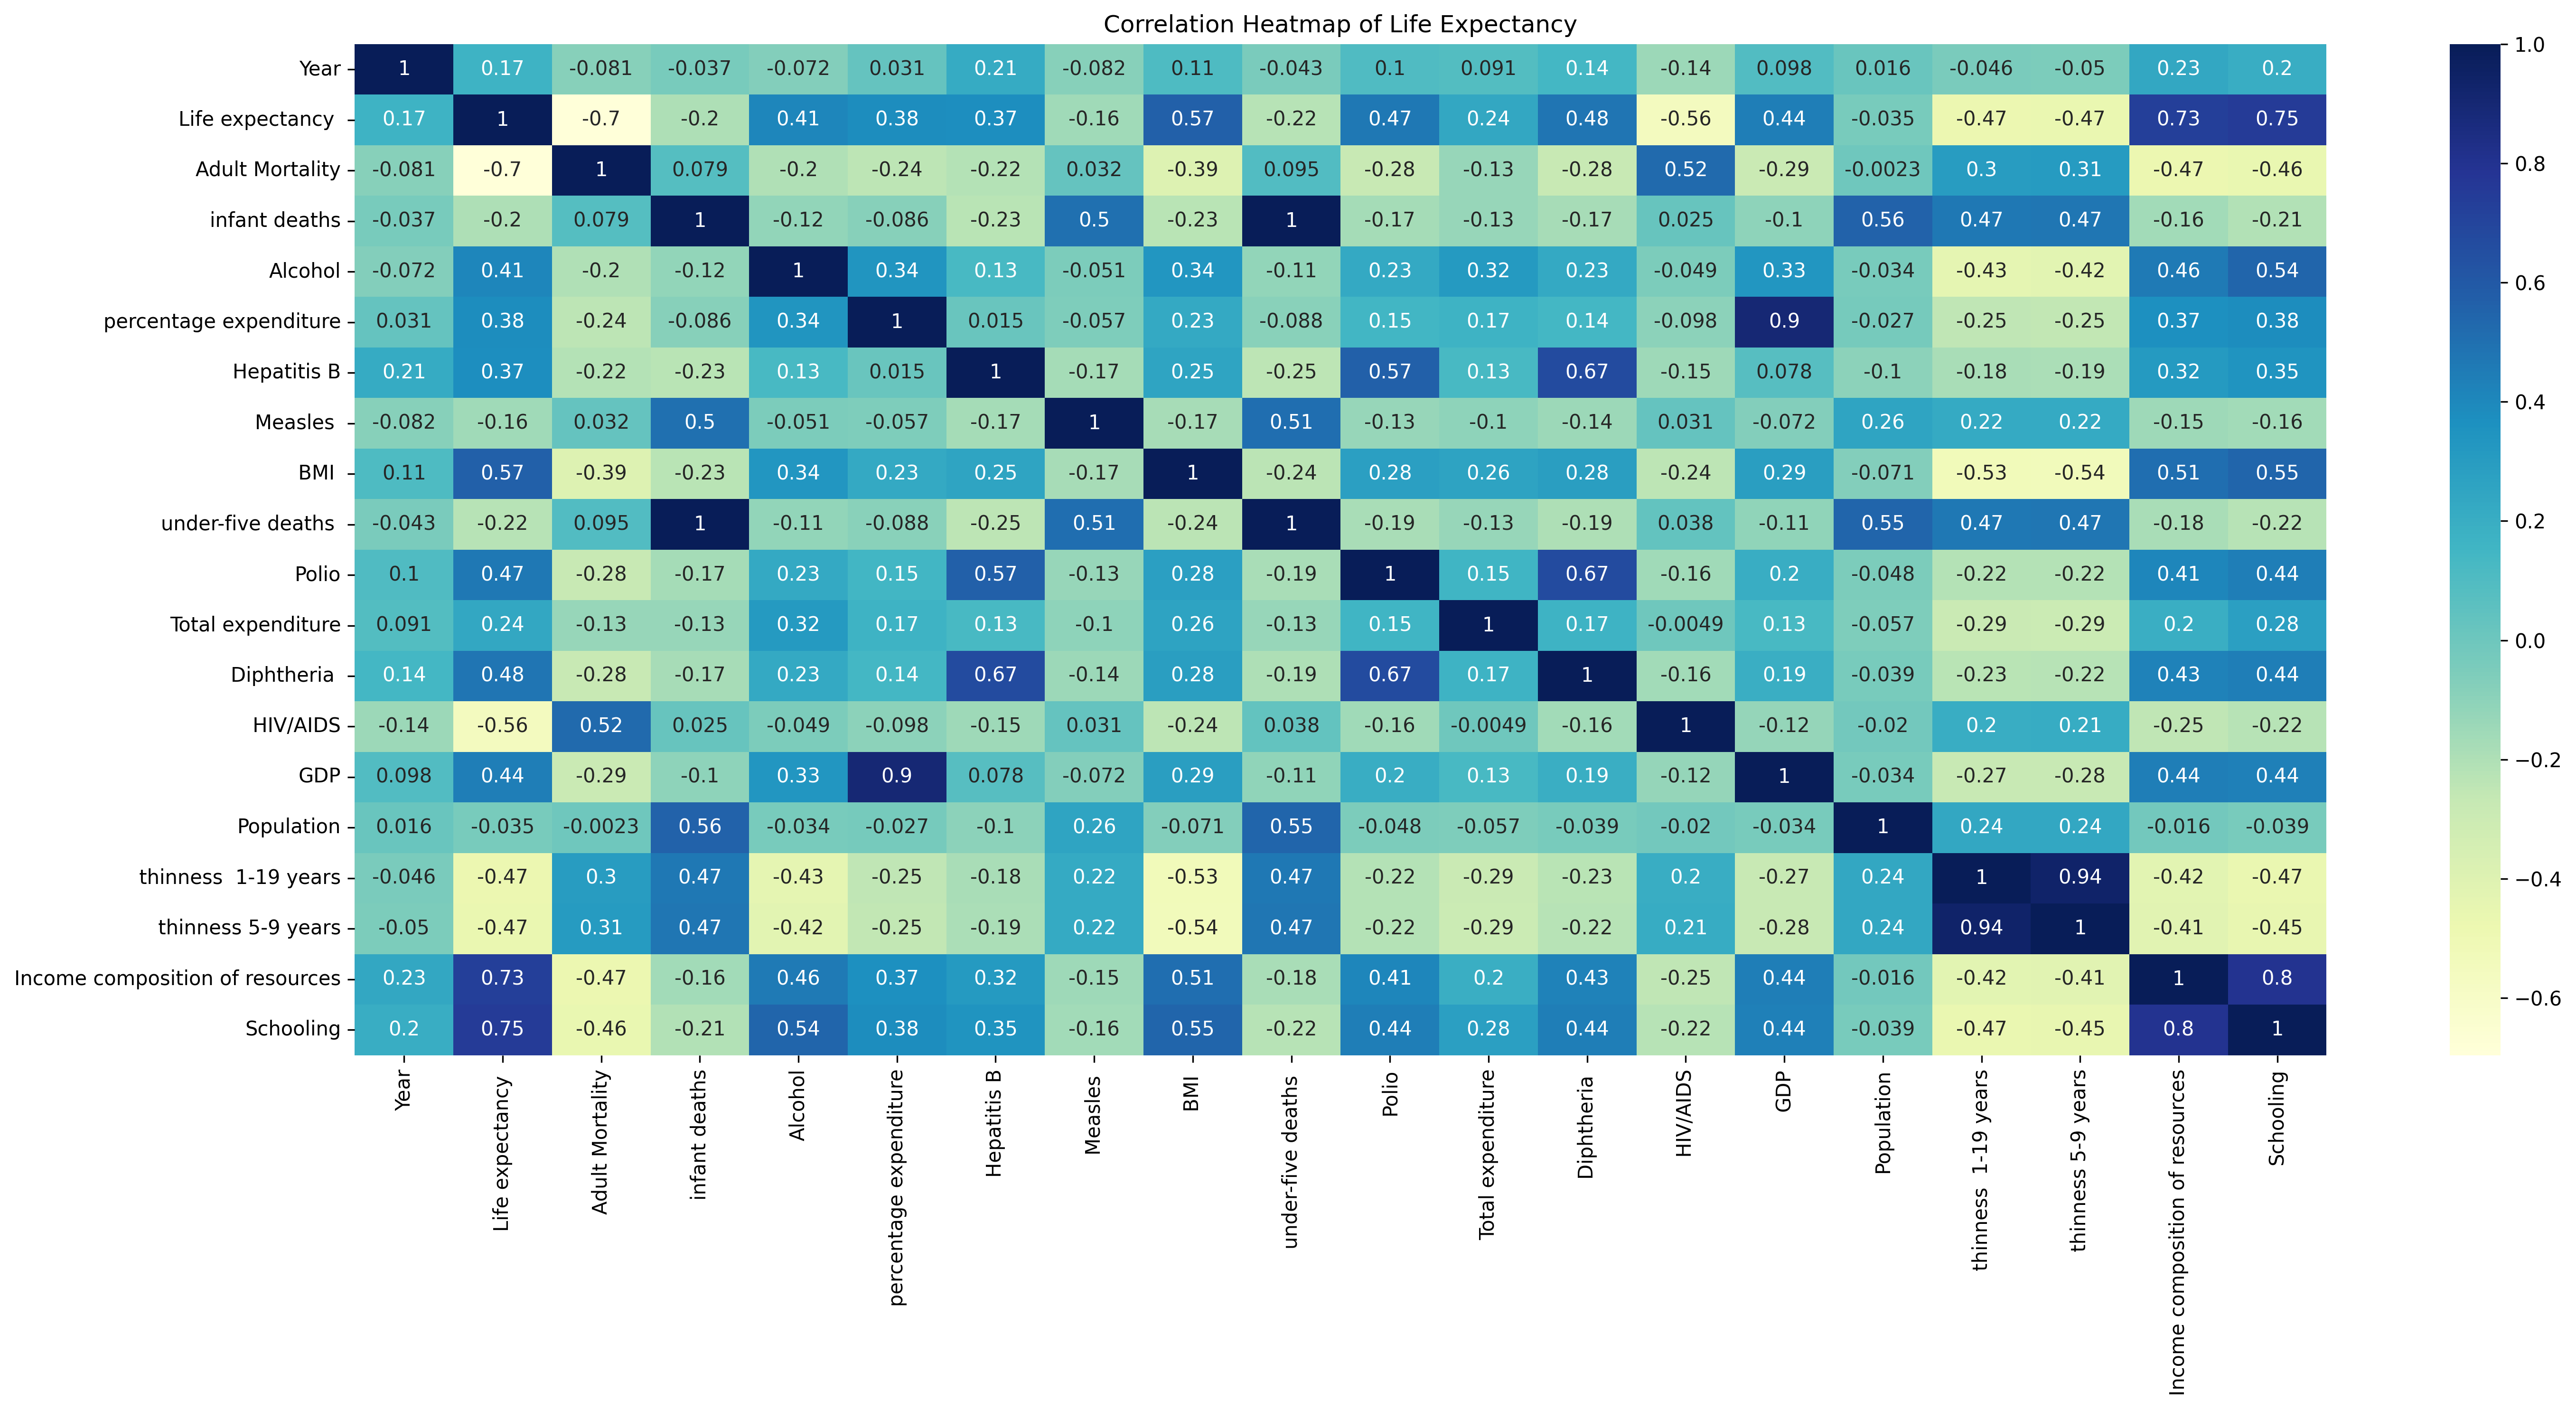

In [ ]:
fig, ax = plt.subplots(figsize=(20,10), dpi=300)
sns.heatmap(corr, cmap='YlGnBu', annot=True)
plt.title('Correlation Heatmap of Life Expectancy')
plt.tight_layout()
plt.show()

## c. Scatter plot

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def scatter_plt_grid(df, cols, user_title=None, color='blue', rows=4, num_cols_per_row=4, figsize=(10, 8), dpi=300):
    fig, ax = plt.subplots(rows, num_cols_per_row, figsize=figsize)
    ax = ax.flatten()

    for i, col in enumerate(cols): 
        if i < len(ax):
            sns.scatterplot(x=df[col], y=df['Life expectancy '], color=color, ax=ax[i])  # Correct scatterplot usage
            ax[i].set_title(col, fontsize=10)  # Smaller title font
            ax[i].tick_params(axis='both', labelsize=8)  # Adjust tick label size
            ax[i].grid(True, linestyle='--', alpha=0.6)

    # Remove unused subplots
    for j in range(i+1, len(ax)):
        fig.delaxes(ax[j])
    
    fig.suptitle(user_title, fontsize=14, fontweight='bold', y=1.02)
    
    plt.tight_layout()
    plt.show()


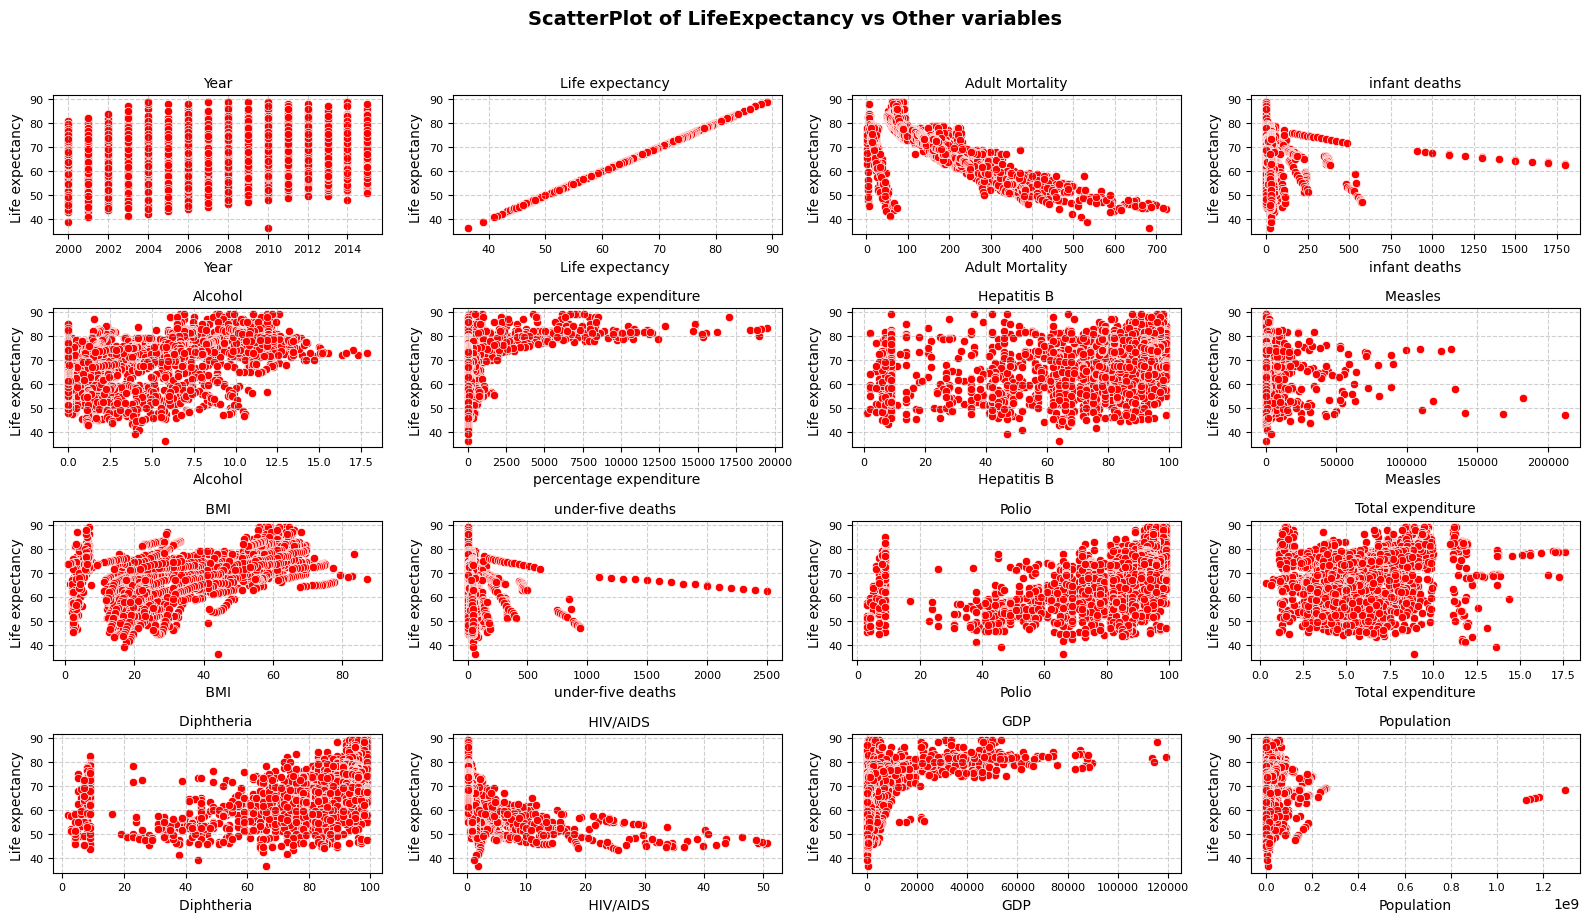

In [ ]:
scatter_plt_grid(df, cols, user_title='ScatterPlot of LifeExpectancy vs Other variables', color='red', rows=4, num_cols_per_row=4, figsize=(16, 9))

In [54]:
cols2 = ['Adult Mortality', 
       ' HIV/AIDS', 'Income composition of resources', 'Schooling', 'Life expectancy ']

In [57]:
fig = px.parallel_coordinates(df.head(100), cols2, color_continuous_scale=px.colors.diverging.Tealrose,
                             color_continuous_midpoint=2)
fig.show()

In [62]:
# Create the parallel coordinates plot
fig = px.parallel_coordinates(df.head(200), 
                              dimensions=cols2, 
                              color='Life expectancy ',  # Column to use for coloring
                              color_continuous_scale=px.colors.diverging.Tealrose,
                              color_continuous_midpoint=2)

# Show the plot
fig.show()